<a href="https://colab.research.google.com/github/shikhass2021/CV-Practicals/blob/main/2147153_CAT1_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CHRIST (Deemed to be University) Department of Computer Science MCA573B / Computer Vision

CAT – 1

DATE: 15-11-2022 Time : 2.00 To 4.00 PM Max Marks:20

SET-2

Submitted by: Shikha Shukla RegNo: 2147153 

## 1. Illustrate Histogram equalization method to enhance the quality of an image and display
## the image, histogram before equalization and after equalization

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


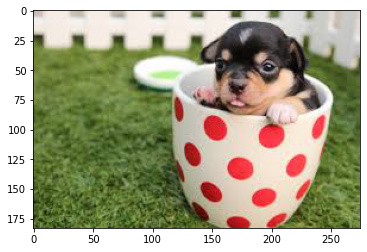

In [ ]:
from matplotlib.image import imread
img=imread("pup.jpg")
plt.imshow(img)

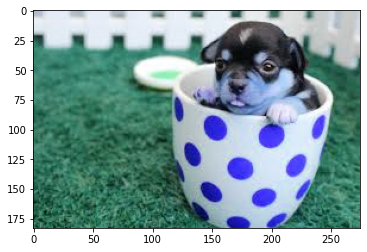

In [ ]:
dark_img = cv2.imread("pup.jpg")
plt.imshow(dark_img)

In [ ]:
eq_img = cv2.equalizeHist(dark_img)

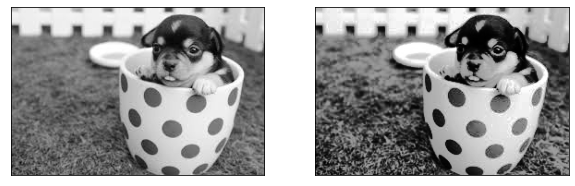

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(dark_img, cmap="gray")
plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(eq_img, cmap="gray")

In [ ]:
dark_img.flatten()

array([184, 185, 187, ..., 100, 106, 113], dtype=uint8)

In [ ]:
hist_dark, _ = np.histogram(dark_img.flatten(), 256, [0, 255])
hist_dark_cdf = hist_dark.cumsum()
dark_cdf_normalised = hist_dark_cdf * float(hist_dark.max()) / hist_dark_cdf.max()

hist_eq, _ = np.histogram(eq_img.flatten(), 256, [0, 255])
hist_eq_cdf = hist_eq.cumsum()
eq_cdf_normalised = hist_eq_cdf * float(hist_eq.max()) / hist_eq_cdf.max()

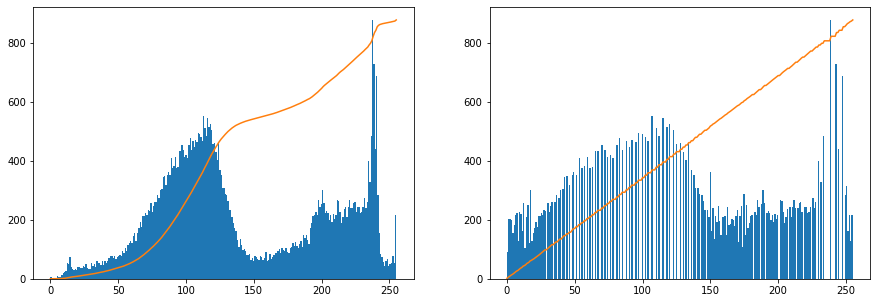

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(dark_img.flatten(), 256, [0,255])
plt.plot(dark_cdf_normalised)
plt.subplot(122)
plt.hist(eq_img.flatten(), 256, [0,255])
plt.plot(eq_cdf_normalised)

## 2. Demonstrate various image preprocessing methods.


2.1 Write a python openCV code to convert the image from the given color model to
different color models.

2.2 Include different types of noises in the input image with various densities and
perform the following

i) Apply linear and non-linear filters to the noise contaminated image with different
mask size.

ii) Display and interpret the result

Any 2 linear and 2 non-linear

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving pup.jpg to pup (1).jpg


In [ ]:
img = cv2.imread("pup.jpg", 1) # Reading in BGR format
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # converting to grayscale
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hls_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
luv_img = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
xyz_img = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)

Text(0.5, 1.0, 'XYZ')

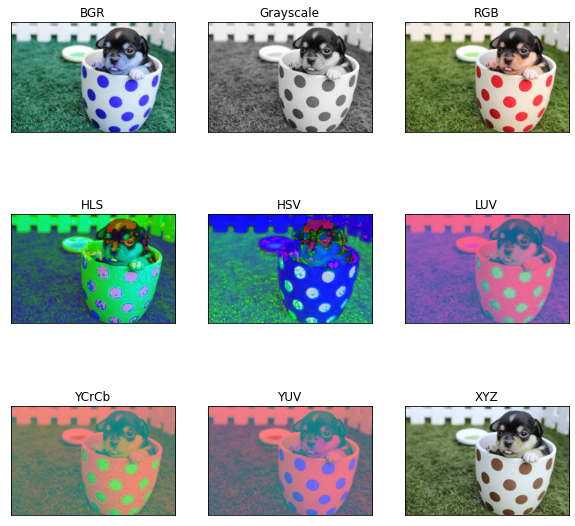

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(331)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.title("BGR")
plt.subplot(332)
plt.imshow(gray_img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Grayscale")
plt.subplot(333)
plt.imshow(rgb_img)
plt.xticks([]), plt.yticks([])
plt.title("RGB")
plt.subplot(334)
plt.imshow(hls_img)
plt.xticks([]), plt.yticks([])
plt.title("HLS")
plt.subplot(335)
plt.imshow(hsv_img, cmap="hsv")
plt.xticks([]), plt.yticks([])
plt.title("HSV")
plt.subplot(336)
plt.imshow(luv_img)
plt.xticks([]), plt.yticks([])
plt.title("LUV")
plt.subplot(337)
plt.imshow(ycrcb_img)
plt.xticks([]), plt.yticks([])
plt.title("YCrCb")
plt.subplot(338)
plt.imshow(yuv_img)
plt.xticks([]), plt.yticks([])
plt.title("YUV")
plt.subplot(339)
plt.imshow(xyz_img)
plt.xticks([]), plt.yticks([])
plt.title("XYZ")

In [ ]:
def s_p_noise(img, s_p, amount):
    row, col = img.shape
    out = np.copy(img)

    # Pepper mode
    num_pepper = np.ceil(amount * img.size * (1. - s_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    out[tuple(coords)] = 0
    
    # Salt mode
    num_salt = np.ceil(amount * img.size * s_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    out[tuple(coords)] = 255
    
    return out

In [ ]:
def gauss_noise(image, mean, sigma):
  row, col = image.shape
  gauss = np.random.normal(mean, sigma, (row, col))
  gauss = gauss.reshape(row, col).astype(np.uint8)
  noisy = cv2.add(image, gauss)

  return noisy

Text(0.5, 1.0, 'Gauss Noise Sigma = Mean = 25')

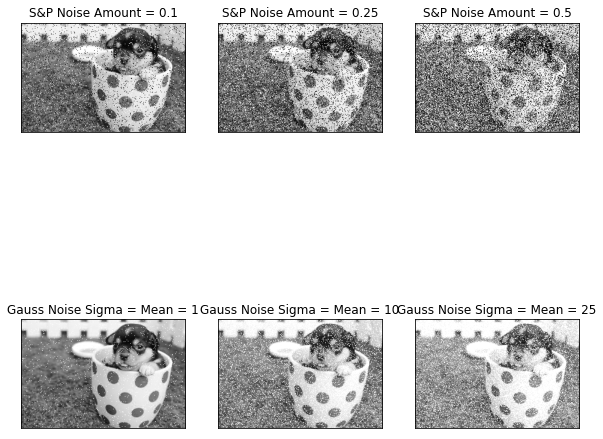

In [ ]:
sp_noise_1 = s_p_noise(gray_img, 0.5, 0.1)
sp_noise_2 = s_p_noise(gray_img, 0.5, 0.25)
sp_noise_3 = s_p_noise(gray_img, 0.5, 0.5)

gauss_noise_1 = gauss_noise(gray_img, 1, 1)
gauss_noise_2 = gauss_noise(gray_img, 10, 10)
gauss_noise_3 = gauss_noise(gray_img, 25, 25)

plt.figure(figsize=(10, 10))
plt.subplot(231)
plt.imshow(sp_noise_1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("S&P Noise Amount = 0.1")
plt.subplot(232)
plt.imshow(sp_noise_2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("S&P Noise Amount = 0.25")
plt.subplot(233)
plt.imshow(sp_noise_3, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("S&P Noise Amount = 0.5")
plt.subplot(234)
plt.imshow(gauss_noise_1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Gauss Noise Sigma = Mean = 1")
plt.subplot(235)
plt.imshow(gauss_noise_2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Gauss Noise Sigma = Mean = 10")
plt.subplot(236)
plt.imshow(gauss_noise_3, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Gauss Noise Sigma = Mean = 25")

In [ ]:
noise_img = sp_noise_1
noise_img2 = gauss_noise_1

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

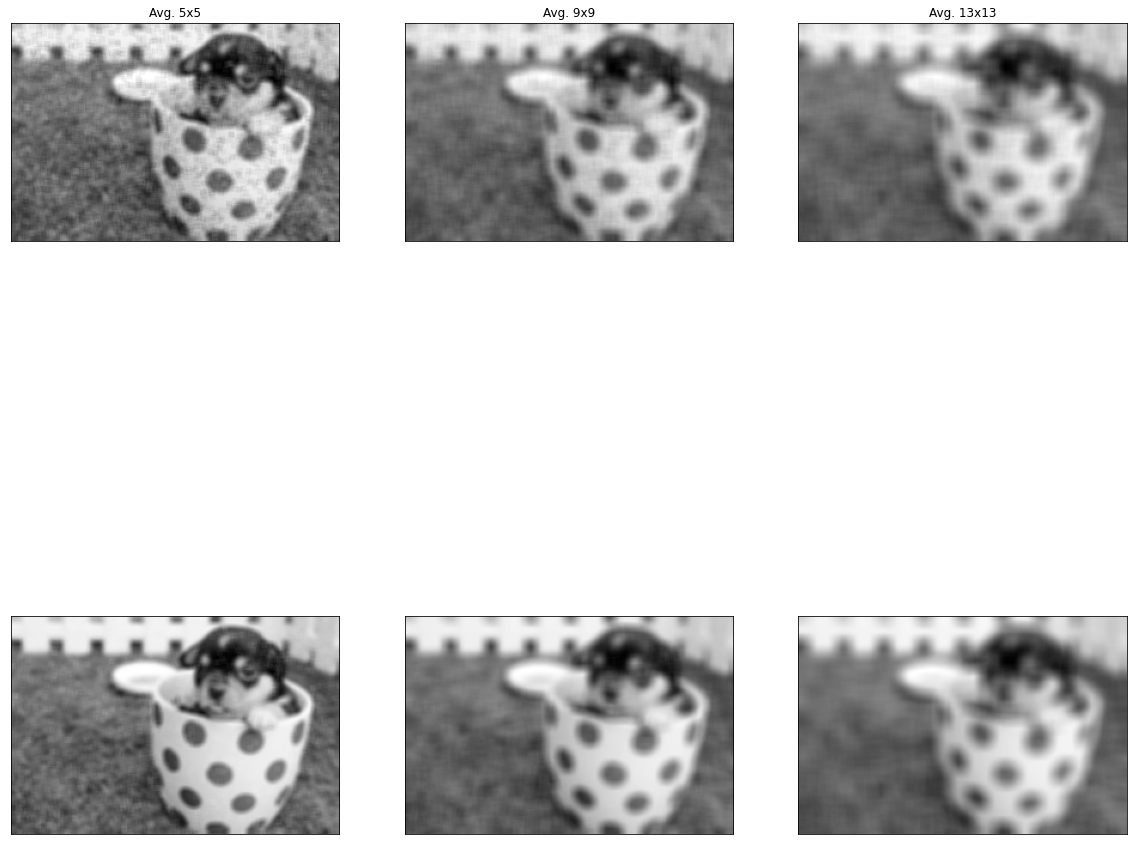

In [ ]:
# Avg Filter
kernel = np.ones((5, 5), np.float32) / 25
kernel1 = np.ones((9, 9), np.float32) / 81
kernel2 = np.ones((13, 13), np.float32) / 169
avg1 = cv2.filter2D(noise_img, -1, kernel)
avg2 = cv2.filter2D(noise_img, -1, kernel1)
avg3 = cv2.filter2D(noise_img, -1, kernel2)
avg4 = cv2.filter2D(noise_img2, -1, kernel)
avg5 = cv2.filter2D(noise_img2, -1, kernel1)
avg6 = cv2.filter2D(noise_img2, -1, kernel2)

plt.figure(figsize=(20,20))
plt.subplot(231)
plt.imshow(avg1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Avg. 5x5")
plt.subplot(232)
plt.imshow(avg2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Avg. 9x9")
plt.subplot(233)
plt.imshow(avg3, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Avg. 13x13")
plt.subplot(234)
plt.imshow(avg4, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(235)
plt.imshow(avg5, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(236)
plt.imshow(avg6, cmap="gray")
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

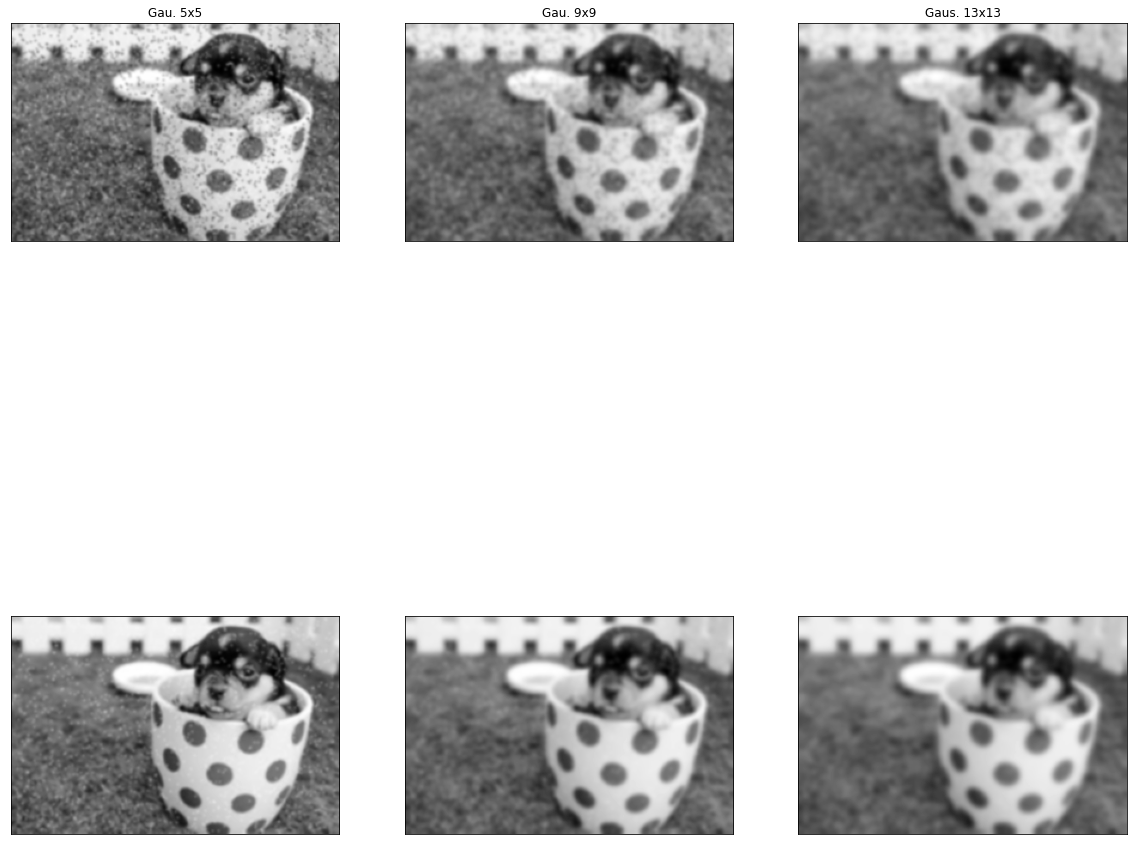

In [ ]:
# Gaussian Blur
gau1 = cv2.GaussianBlur(noise_img, (5, 5), 0)
gau2 = cv2.GaussianBlur(noise_img, (9, 9), 0)
gau3 = cv2.GaussianBlur(noise_img, (13, 13), 0)
gau4 = cv2.GaussianBlur(noise_img2, (5, 5), 0)
gau5 = cv2.GaussianBlur(noise_img2, (9, 9), 0)
gau6 = cv2.GaussianBlur(noise_img2, (13, 13), 0)

plt.figure(figsize=(20,20))
plt.subplot(231)
plt.imshow(gau1, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Gau. 5x5")
plt.subplot(232)
plt.imshow(gau2, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Gau. 9x9")
plt.subplot(233)
plt.imshow(gau3, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.title("Gaus. 13x13")
plt.subplot(234)
plt.imshow(gau4, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(235)
plt.imshow(gau5, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(236)
plt.imshow(gau6, cmap="gray")
plt.xticks([]), plt.yticks([])

ii) Display and interpret the result



Higher kernel size = more blurring

At a first glance, median filter works best for both types of noises, especially at lower kernel sizes. An exception to the rule is bilateral filter applied to image with Gaussian noise. In that case, bilateral is superior to median.